In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [14]:
# read data and apply one-hot encoding
# data = pd.read_csv("iris.csv", header=None)
# X = data.iloc[:, 0:4]
# y = data.iloc[:, 4:]
# ohe = OneHotEncoder(sparse=False).fit(y)
# # y = ohe.transform(y)

# # from sklearn.preprocessing import OneHotEncoder
# # ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
# # print(ohe.categories_)

# y = ohe.transform(y)
# print(y)

TargetMol_DMSO_PMA_df = pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/TargetMol_DMSO+PMA_HistDiff_concat_UPDATED-20231026.csv',index_col=0)


In [15]:
display(TargetMol_DMSO_PMA_df)

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
F15._.TargetMol_09_rep1,-0.023018,-0.000627,-0.013967,-0.023206,-0.027200,0.000000,-0.016361,-0.012396,-0.038797,0.006155,...,0.019312,0.018275,0.013980,0.017754,-0.000120,0.000785,0.026411,-0.033172,0.058362,0.050031
E08._.TargetMol_09_rep1,-0.001458,-0.000134,-0.000768,-0.001583,-0.001291,0.000000,-0.004660,-0.000753,-0.000789,-0.000080,...,-0.000294,-0.000201,-0.000510,-0.000304,-0.000042,0.000048,-0.000164,0.000804,-0.003375,-0.002612
B19._.TargetMol_09_rep1,-0.001428,0.000003,-0.000053,-0.001329,-0.001647,0.000000,0.000076,-0.000156,0.000093,-0.000053,...,0.000096,0.000122,-0.000074,0.000406,0.000113,0.000012,0.000188,-0.000171,-0.000919,-0.000805
C12._.TargetMol_09_rep1,-0.001418,-0.000141,-0.000144,-0.000390,-0.000139,0.000000,-0.001255,-0.000190,-0.000131,0.000011,...,-0.000759,-0.000132,-0.000505,-0.000499,-0.000066,0.000008,-0.000095,0.001855,-0.004164,-0.002819
G01._.TargetMol_09_rep1,0.000485,0.000249,0.000488,0.000414,0.000061,0.000000,0.002202,0.000619,0.007479,-0.001683,...,0.002220,0.001206,0.001604,0.002211,0.001015,0.000188,0.001717,-0.002011,-0.000013,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E09._.TargetMol_27PMA_rep1,0.001480,0.000536,0.001984,0.003714,0.003234,0.001103,-0.000546,0.001238,0.004090,0.001161,...,-0.000338,-0.001211,-0.000287,-0.000263,0.000522,0.000197,0.000790,0.001063,-0.000802,-0.001298
N16._.TargetMol_27PMA_rep1,0.000985,-0.000093,-0.000270,-0.000079,0.000203,0.000158,0.000200,-0.000160,-0.001012,-0.000125,...,0.000244,0.001117,0.000975,-0.000158,-0.001174,0.001397,-0.000160,-0.001273,0.000981,0.001614
L05._.TargetMol_27PMA_rep1,0.000321,-0.001211,-0.000992,-0.000677,-0.001543,0.005264,-0.011616,-0.000380,-0.028896,0.022583,...,-0.306248,-0.330332,-0.050489,-0.299820,0.138208,-0.169100,-0.018886,0.214171,-0.076240,-0.102679
J18._.TargetMol_27PMA_rep1,-0.000111,-0.004516,-0.000372,-0.000770,-0.000030,-0.000451,-0.010148,-0.001540,-0.016748,-0.000391,...,0.007084,-0.020235,-0.018078,0.005119,0.013297,-0.000739,0.003184,0.015241,0.018912,0.004949


In [16]:
Key = pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [18]:
display(Key['Target'])

unambiguous_name
A01._.TargetMol_01_rep1              DMSO
A02._.TargetMol_01_rep1         Apoptosis
A03._.TargetMol_01_rep1               FAK
A04._.TargetMol_01_rep1              DMSO
A05._.TargetMol_01_rep1            Myosin
                                 ...     
P20._.TargetMol_28PMA_rep1    NPF-Hexagon
P21._.TargetMol_28PMA_rep1    NPF-Hexagon
P22._.TargetMol_28PMA_rep1    NPF-Hexagon
P23._.TargetMol_28PMA_rep1    NPF-Hexagon
P24._.TargetMol_28PMA_rep1       DMSO+PMA
Name: Target, Length: 23792, dtype: object

In [19]:
combined = pd.merge(left=TargetMol_DMSO_PMA_df,right=Key['Target'],left_index=True,right_index=True)

In [20]:
combined

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2,Target
A01._.TargetMol_01PMA_rep1,-0.003041,-0.011715,-0.010194,-0.013844,-0.009896,0.000971,-0.036730,-0.018943,-0.024087,0.030330,...,-0.330214,-0.027600,-0.271068,0.243881,-2.166542e-07,-0.000029,0.256609,-0.024182,-0.033303,DMSO
A01._.TargetMol_01PMA_rep2,-0.001183,0.000748,0.000127,0.000186,0.000354,0.006467,-0.005407,0.000099,-0.020500,0.008449,...,-0.283609,-0.055801,-0.245371,0.169670,-4.675196e-02,0.000353,0.235398,-0.060292,-0.088151,DMSO
A01._.TargetMol_01_rep1,0.000012,-0.000006,0.000012,-0.000006,0.000039,0.000000,0.021561,-0.000007,0.024419,-0.003240,...,-0.000087,-0.000972,0.000908,-0.000339,-1.428537e-06,-0.000004,-0.001515,0.000559,0.001682,DMSO
A01._.TargetMol_01_rep2,-0.000712,-0.000029,-0.002048,-0.000925,-0.000012,-0.003094,0.005183,-0.000371,-0.003746,-0.003083,...,0.000038,-0.008986,0.000691,-0.000316,-8.111013e-06,-0.000931,0.000627,-0.000351,0.000295,DMSO
A01._.TargetMol_02PMA_rep1,-0.001054,-0.012746,-0.002486,-0.006576,0.000193,0.000045,-0.014441,-0.007188,-0.017577,0.015990,...,-0.345183,-0.031406,-0.278377,0.208430,-4.699613e-05,0.000006,0.244385,-0.047646,-0.065632,DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P24._.TargetMol_25_rep1,-0.019294,-0.008890,-0.014126,-0.023498,-0.025688,-0.026680,0.013603,-0.025579,-0.004610,-0.046275,...,0.349484,0.044780,0.252650,-0.203440,2.095852e-01,-0.003958,-0.238720,0.148360,0.117014,DMSO+PMA
P24._.TargetMol_26PMA_rep1,-0.061444,-0.050609,-0.073434,-0.082833,-0.021564,0.000000,-0.002310,-0.078518,-0.130805,-0.000025,...,-0.002380,-0.006040,0.002244,0.012779,-3.818594e-03,0.002365,0.003884,0.005184,0.003051,DMSO+PMA
P24._.TargetMol_26_rep1,-0.010205,-0.001320,-0.008952,-0.016760,-0.016715,-0.000367,0.013601,-0.012283,-0.002480,-0.040179,...,0.359281,0.039037,0.300077,-0.177276,1.946754e-01,0.009702,-0.260371,0.142457,0.167313,DMSO+PMA
P24._.TargetMol_27PMA_rep1,-0.042738,-0.011896,-0.025118,-0.049515,-0.060243,-0.058637,-0.000072,-0.017934,-0.075794,-0.002042,...,0.002507,-0.001783,0.003638,-0.001062,7.341728e-04,0.000772,-0.001091,0.007953,0.005194,DMSO+PMA


In [22]:
X = combined.iloc[:, :-1].values
y = combined['Target'].values.reshape(-1,1)
ohe = OneHotEncoder(sparse=False).fit(y)
y = ohe.transform(y)

In [28]:
len(combined['Target'].unique())

366

In [24]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [25]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


In [41]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
#         self.hidden = nn.Linear(4, 8)
        self.hidden = nn.Linear(5880, 5000)
        self.act = nn.ReLU()
#         self.hidden2 = nn.Conv1d(5000,2000,kernel_size=2) #
        self.hidden2 = nn.Linear(5000,2000)
        self.act2 = nn.ReLU() #
        self.hidden3 = nn.Linear(2000,1000) #
        self.act3 = nn.ReLU() #
#         self.hidden4 = nn.Conv1d(1000,500,kernel_size=2) #
        self.hidden4 = nn.Linear(1000,500)
        self.act4 = nn.ReLU() #
#         self.hidden5 = nn.Conv1d(500,366,kernel_size=2) #
        self.hidden5 = nn.Linear(500,366)
        self.act5 = nn.ReLU() #
        self.soft_max = nn.Softmax() #
        self.output = nn.Linear(366, 366) #8,3

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.act2(self.hidden2(x)) #
        x = self.act3(self.hidden3(x)) #
        x = self.act4(self.hidden4(x)) #
        x = self.act5(self.hidden5(x)) #
#         x = self.act2(self.hidden2(x)) #
        x = self.output(x)
        x = self.soft_max(x) #
        return x

In [44]:
# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 200
batch_size = 50
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

In [45]:
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0: 100%|███████████████████████████████████████████████| 322/322 [01:36<00:00,  3.33batch/s, acc=0.08, loss=5.83]


Epoch 0 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 1: 100%|███████████████████████████████████████████████| 322/322 [01:38<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 1 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 2: 100%|███████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 2 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 3: 100%|███████████████████████████████████████████████| 322/322 [01:36<00:00,  3.33batch/s, acc=0.08, loss=5.83]


Epoch 3 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 4: 100%|███████████████████████████████████████████████| 322/322 [01:37<00:00,  3.31batch/s, acc=0.08, loss=5.83]


Epoch 4 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 5: 100%|███████████████████████████████████████████████| 322/322 [01:36<00:00,  3.34batch/s, acc=0.08, loss=5.83]


Epoch 5 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 6: 100%|███████████████████████████████████████████████| 322/322 [01:36<00:00,  3.34batch/s, acc=0.08, loss=5.83]


Epoch 6 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 7: 100%|███████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 7 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 8: 100%|███████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 8 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 9: 100%|███████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 9 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 10: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 10 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 11: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 11 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 12: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 12 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 13: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 13 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 14: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 14 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 15: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.39batch/s, acc=0.08, loss=5.83]


Epoch 15 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 16: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 16 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 17: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 17 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 18: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 18 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 19: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 19 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 20: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 20 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 21: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 21 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 22: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 22 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 23: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 23 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 24: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.35batch/s, acc=0.08, loss=5.83]


Epoch 24 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 25: 100%|██████████████████████████████████████████████| 322/322 [01:41<00:00,  3.18batch/s, acc=0.08, loss=5.83]


Epoch 25 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 26: 100%|██████████████████████████████████████████████| 322/322 [01:37<00:00,  3.29batch/s, acc=0.08, loss=5.83]


Epoch 26 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 27: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 27 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 28: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 28 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 29: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 29 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 30: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 30 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 31: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 31 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 32: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 32 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 33: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 33 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 34: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 34 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 35: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 35 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 36: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 36 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 37: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 37 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 38: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 38 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 39: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 39 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 40: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 40 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 41: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 41 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 42: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 42 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 43: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 43 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 44: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 44 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 45: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 45 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 46: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 46 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 47: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 47 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 48: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 48 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 49: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 49 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 50: 100%|██████████████████████████████████████████████| 322/322 [01:41<00:00,  3.16batch/s, acc=0.08, loss=5.83]


Epoch 50 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 51: 100%|██████████████████████████████████████████████| 322/322 [01:41<00:00,  3.17batch/s, acc=0.08, loss=5.83]


Epoch 51 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 52: 100%|██████████████████████████████████████████████| 322/322 [01:42<00:00,  3.13batch/s, acc=0.08, loss=5.83]


Epoch 52 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 53: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 53 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 54: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 54 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 55: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 55 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 56: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 56 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 57: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.19batch/s, acc=0.08, loss=5.83]


Epoch 57 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 58: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 58 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 59: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 59 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 60: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 60 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 61: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.19batch/s, acc=0.08, loss=5.83]


Epoch 61 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 62: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 62 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 63: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 63 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 64: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 64 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 65: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 65 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 66: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 66 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 67: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 67 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 68: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 68 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 69: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 69 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 70: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 70 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 71: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 71 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 72: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 72 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 73: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 73 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 74: 100%|██████████████████████████████████████████████| 322/322 [01:40<00:00,  3.21batch/s, acc=0.08, loss=5.83]


Epoch 74 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 75: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 75 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 76: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 76 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 77: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 77 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 78: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 78 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 79: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 79 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 80: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 80 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 81: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 81 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 82: 100%|██████████████████████████████████████████████| 322/322 [01:37<00:00,  3.29batch/s, acc=0.08, loss=5.83]


Epoch 82 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 83: 100%|██████████████████████████████████████████████| 322/322 [01:37<00:00,  3.30batch/s, acc=0.08, loss=5.83]


Epoch 83 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 84: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 84 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 85: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 85 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 86: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 86 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 87: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 87 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 88: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 88 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 89: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 89 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 90: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.24batch/s, acc=0.08, loss=5.83]


Epoch 90 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 91: 100%|██████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 91 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 92: 100%|██████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 92 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 93: 100%|██████████████████████████████████████████████| 322/322 [01:37<00:00,  3.30batch/s, acc=0.08, loss=5.83]


Epoch 93 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 94: 100%|██████████████████████████████████████████████| 322/322 [01:37<00:00,  3.31batch/s, acc=0.08, loss=5.83]


Epoch 94 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 95: 100%|██████████████████████████████████████████████| 322/322 [01:36<00:00,  3.34batch/s, acc=0.08, loss=5.83]


Epoch 95 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 96: 100%|██████████████████████████████████████████████| 322/322 [01:36<00:00,  3.32batch/s, acc=0.08, loss=5.83]


Epoch 96 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 97: 100%|██████████████████████████████████████████████| 322/322 [01:36<00:00,  3.35batch/s, acc=0.08, loss=5.83]


Epoch 97 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 98: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.36batch/s, acc=0.08, loss=5.83]


Epoch 98 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 99: 100%|██████████████████████████████████████████████| 322/322 [01:35<00:00,  3.36batch/s, acc=0.08, loss=5.83]


Epoch 99 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 100: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 100 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 101: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 101 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 102: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 102 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 103: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 103 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 104: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 104 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 105: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 105 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 106: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.38batch/s, acc=0.08, loss=5.83]


Epoch 106 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 107: 100%|█████████████████████████████████████████████| 322/322 [01:35<00:00,  3.37batch/s, acc=0.08, loss=5.83]


Epoch 107 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 108: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 108 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 109: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 109 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 110: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 110 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 111: 100%|█████████████████████████████████████████████| 322/322 [01:37<00:00,  3.29batch/s, acc=0.08, loss=5.83]


Epoch 111 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 112: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 112 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 113: 100%|█████████████████████████████████████████████| 322/322 [01:37<00:00,  3.29batch/s, acc=0.08, loss=5.83]


Epoch 113 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 114: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 114 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 115: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 115 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 116: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 116 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 117: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 117 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 118: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 118 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 119: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.28batch/s, acc=0.08, loss=5.83]


Epoch 119 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 120: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.32batch/s, acc=0.08, loss=5.83]


Epoch 120 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 121: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.32batch/s, acc=0.08, loss=5.83]


Epoch 121 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 122: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.33batch/s, acc=0.08, loss=5.83]


Epoch 122 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 123: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.33batch/s, acc=0.08, loss=5.83]


Epoch 123 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 124: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.32batch/s, acc=0.08, loss=5.83]


Epoch 124 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 125: 100%|█████████████████████████████████████████████| 322/322 [01:36<00:00,  3.33batch/s, acc=0.08, loss=5.83]


Epoch 125 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 126: 100%|█████████████████████████████████████████████| 322/322 [01:37<00:00,  3.32batch/s, acc=0.08, loss=5.83]


Epoch 126 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 127: 100%|█████████████████████████████████████████████| 322/322 [01:37<00:00,  3.31batch/s, acc=0.08, loss=5.83]


Epoch 127 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 128: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.27batch/s, acc=0.08, loss=5.83]


Epoch 128 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 129: 100%|█████████████████████████████████████████████| 322/322 [01:39<00:00,  3.25batch/s, acc=0.08, loss=5.83]


Epoch 129 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 130: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 130 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 131: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 131 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 132: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 132 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 133: 100%|█████████████████████████████████████████████| 322/322 [01:38<00:00,  3.26batch/s, acc=0.08, loss=5.83]


Epoch 133 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 134: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.22batch/s, acc=0.08, loss=5.83]


Epoch 134 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 135: 100%|█████████████████████████████████████████████| 322/322 [01:39<00:00,  3.23batch/s, acc=0.08, loss=5.83]


Epoch 135 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 136: 100%|█████████████████████████████████████████████| 322/322 [01:42<00:00,  3.15batch/s, acc=0.08, loss=5.83]


Epoch 136 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 137: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.17batch/s, acc=0.08, loss=5.83]


Epoch 137 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 138: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.21batch/s, acc=0.08, loss=5.83]


Epoch 138 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 139: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.21batch/s, acc=0.08, loss=5.83]


Epoch 139 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 140: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.22batch/s, acc=0.08, loss=5.83]


Epoch 140 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 141: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.22batch/s, acc=0.08, loss=5.83]


Epoch 141 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 142: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 142 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 143: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.19batch/s, acc=0.08, loss=5.83]


Epoch 143 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 144: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.18batch/s, acc=0.08, loss=5.83]


Epoch 144 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 145: 100%|█████████████████████████████████████████████| 322/322 [01:40<00:00,  3.20batch/s, acc=0.08, loss=5.83]


Epoch 145 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 146: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.18batch/s, acc=0.08, loss=5.83]


Epoch 146 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 147: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.18batch/s, acc=0.08, loss=5.83]


Epoch 147 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 148: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.18batch/s, acc=0.08, loss=5.83]


Epoch 148 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 149: 100%|█████████████████████████████████████████████| 322/322 [01:41<00:00,  3.17batch/s, acc=0.08, loss=5.83]


Epoch 149 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 150: 100%|█████████████████████████████████████████████| 322/322 [01:42<00:00,  3.15batch/s, acc=0.08, loss=5.83]


Epoch 150 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 151: 100%|█████████████████████████████████████████████| 322/322 [01:42<00:00,  3.13batch/s, acc=0.08, loss=5.83]


Epoch 151 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 152: 100%|█████████████████████████████████████████████| 322/322 [01:43<00:00,  3.12batch/s, acc=0.08, loss=5.83]


Epoch 152 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 153: 100%|█████████████████████████████████████████████| 322/322 [01:45<00:00,  3.06batch/s, acc=0.08, loss=5.83]


Epoch 153 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 154: 100%|█████████████████████████████████████████████| 322/322 [01:45<00:00,  3.06batch/s, acc=0.08, loss=5.83]


Epoch 154 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 155: 100%|█████████████████████████████████████████████| 322/322 [01:46<00:00,  3.03batch/s, acc=0.08, loss=5.83]


Epoch 155 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 156: 100%|█████████████████████████████████████████████| 322/322 [01:47<00:00,  3.00batch/s, acc=0.08, loss=5.83]


Epoch 156 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 157: 100%|█████████████████████████████████████████████| 322/322 [01:48<00:00,  2.97batch/s, acc=0.08, loss=5.83]


Epoch 157 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 158: 100%|█████████████████████████████████████████████| 322/322 [01:49<00:00,  2.93batch/s, acc=0.08, loss=5.83]


Epoch 158 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 159: 100%|█████████████████████████████████████████████| 322/322 [01:51<00:00,  2.90batch/s, acc=0.08, loss=5.83]


Epoch 159 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 160: 100%|█████████████████████████████████████████████| 322/322 [01:52<00:00,  2.87batch/s, acc=0.08, loss=5.83]


Epoch 160 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 161: 100%|█████████████████████████████████████████████| 322/322 [01:53<00:00,  2.84batch/s, acc=0.08, loss=5.83]


Epoch 161 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 162: 100%|█████████████████████████████████████████████| 322/322 [01:54<00:00,  2.81batch/s, acc=0.08, loss=5.83]


Epoch 162 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 163: 100%|█████████████████████████████████████████████| 322/322 [01:55<00:00,  2.78batch/s, acc=0.08, loss=5.83]


Epoch 163 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 164: 100%|█████████████████████████████████████████████| 322/322 [01:56<00:00,  2.76batch/s, acc=0.08, loss=5.83]


Epoch 164 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 165: 100%|█████████████████████████████████████████████| 322/322 [01:57<00:00,  2.74batch/s, acc=0.08, loss=5.83]


Epoch 165 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 166: 100%|█████████████████████████████████████████████| 322/322 [01:57<00:00,  2.73batch/s, acc=0.08, loss=5.83]


Epoch 166 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 167: 100%|█████████████████████████████████████████████| 322/322 [01:59<00:00,  2.70batch/s, acc=0.08, loss=5.83]


Epoch 167 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 168: 100%|█████████████████████████████████████████████| 322/322 [02:00<00:00,  2.67batch/s, acc=0.08, loss=5.83]


Epoch 168 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 169: 100%|█████████████████████████████████████████████| 322/322 [02:00<00:00,  2.67batch/s, acc=0.08, loss=5.83]


Epoch 169 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 170: 100%|█████████████████████████████████████████████| 322/322 [02:01<00:00,  2.64batch/s, acc=0.08, loss=5.83]


Epoch 170 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 171: 100%|█████████████████████████████████████████████| 322/322 [02:02<00:00,  2.62batch/s, acc=0.08, loss=5.83]


Epoch 171 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 172: 100%|█████████████████████████████████████████████| 322/322 [02:03<00:00,  2.60batch/s, acc=0.08, loss=5.83]


Epoch 172 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 173: 100%|█████████████████████████████████████████████| 322/322 [02:04<00:00,  2.58batch/s, acc=0.08, loss=5.83]


Epoch 173 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 174: 100%|█████████████████████████████████████████████| 322/322 [02:05<00:00,  2.56batch/s, acc=0.08, loss=5.83]


Epoch 174 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 175: 100%|█████████████████████████████████████████████| 322/322 [02:06<00:00,  2.55batch/s, acc=0.08, loss=5.83]


Epoch 175 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 176: 100%|█████████████████████████████████████████████| 322/322 [02:07<00:00,  2.53batch/s, acc=0.08, loss=5.83]


Epoch 176 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 177: 100%|█████████████████████████████████████████████| 322/322 [02:08<00:00,  2.51batch/s, acc=0.08, loss=5.83]


Epoch 177 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 178: 100%|█████████████████████████████████████████████| 322/322 [02:07<00:00,  2.52batch/s, acc=0.08, loss=5.83]


Epoch 178 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 179: 100%|█████████████████████████████████████████████| 322/322 [02:07<00:00,  2.52batch/s, acc=0.08, loss=5.83]


Epoch 179 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 180: 100%|█████████████████████████████████████████████| 322/322 [02:07<00:00,  2.52batch/s, acc=0.08, loss=5.83]


Epoch 180 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 181: 100%|█████████████████████████████████████████████| 322/322 [02:08<00:00,  2.51batch/s, acc=0.08, loss=5.83]


Epoch 181 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 182: 100%|█████████████████████████████████████████████| 322/322 [02:08<00:00,  2.50batch/s, acc=0.08, loss=5.83]


Epoch 182 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 183: 100%|█████████████████████████████████████████████| 322/322 [02:08<00:00,  2.50batch/s, acc=0.08, loss=5.83]


Epoch 183 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 184: 100%|█████████████████████████████████████████████| 322/322 [02:08<00:00,  2.50batch/s, acc=0.08, loss=5.83]


Epoch 184 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 185: 100%|█████████████████████████████████████████████| 322/322 [02:09<00:00,  2.49batch/s, acc=0.08, loss=5.83]


Epoch 185 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 186: 100%|█████████████████████████████████████████████| 322/322 [02:09<00:00,  2.48batch/s, acc=0.08, loss=5.83]


Epoch 186 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 187: 100%|█████████████████████████████████████████████| 322/322 [02:09<00:00,  2.49batch/s, acc=0.08, loss=5.83]


Epoch 187 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 188: 100%|█████████████████████████████████████████████| 322/322 [02:09<00:00,  2.48batch/s, acc=0.08, loss=5.83]


Epoch 188 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 189: 100%|█████████████████████████████████████████████| 322/322 [02:10<00:00,  2.47batch/s, acc=0.08, loss=5.83]


Epoch 189 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 190: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.46batch/s, acc=0.08, loss=5.83]


Epoch 190 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 191: 100%|█████████████████████████████████████████████| 322/322 [02:10<00:00,  2.46batch/s, acc=0.08, loss=5.83]


Epoch 191 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 192: 100%|█████████████████████████████████████████████| 322/322 [02:10<00:00,  2.46batch/s, acc=0.08, loss=5.83]


Epoch 192 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 193: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.46batch/s, acc=0.08, loss=5.83]


Epoch 193 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 194: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.45batch/s, acc=0.08, loss=5.83]


Epoch 194 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 195: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.46batch/s, acc=0.08, loss=5.83]


Epoch 195 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 196: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.45batch/s, acc=0.08, loss=5.83]


Epoch 196 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 197: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.45batch/s, acc=0.08, loss=5.83]


Epoch 197 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 198: 100%|█████████████████████████████████████████████| 322/322 [02:12<00:00,  2.44batch/s, acc=0.08, loss=5.83]


Epoch 198 validation: Cross-entropy=5.82, Accuracy=8.4%


Epoch 199: 100%|█████████████████████████████████████████████| 322/322 [02:11<00:00,  2.44batch/s, acc=0.08, loss=5.83]


Epoch 199 validation: Cross-entropy=5.82, Accuracy=8.4%


<All keys matched successfully>

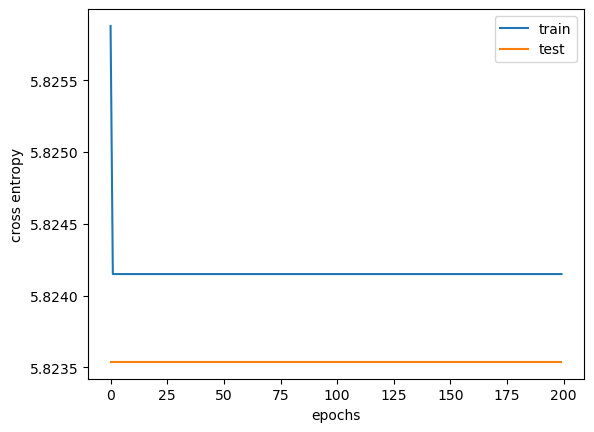

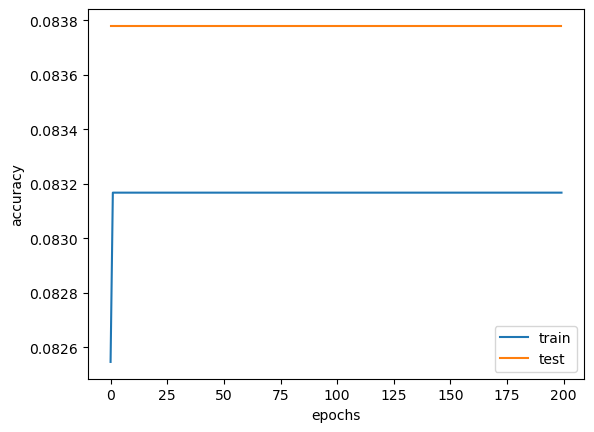

In [46]:


# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()